In [120]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import math
from sklearn import neighbors
import os
import os.path
import pickle
from PIL import Image, ImageDraw

## Step 1: Load Data

Python version 3.12.4

In [121]:
# face_recognizer/
# ├── output/
# |
# ├── training/
# │   └── nicolas_cage/
# │       ├─ class0
# │       └─ class1
# |
# ├── validation/
# │   └── nicolas_cage/
# │       ├── class0
# │       └── class1
# |
# ├── detector
# └── unknown.jpg

In [123]:
# Image augmentations
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [124]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (200, 200),
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 class_mode = "binary")

print(training_set.class_indices)

Found 290 images belonging to 2 classes.
{'class0': 0, 'class1': 1}


In [125]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (200, 200),
                                            batch_size = 32,
                                            shuffle = True,
                                            class_mode = "binary")
print(test_set.class_indices)

Found 124 images belonging to 2 classes.


{'class0': 0, 'class1': 1}


## Step 2: Create CNN

In [150]:
# Attribute: https://github.com/DrewScatterday/Nicolas_Cage/blob/master/Nic_Cage_Explanation.ipynb
# author: DrewScatterday


# # building our model
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 64, activation = 'relu'))

classifier.add(Dropout(0.5))

# output layer
classifier.add(Dense(1, activation='sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# classifier.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
# classifier.compile(optimizer=Adam(lr=0.0005), loss="mae")

C:\Users\nadia\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 3: Train and Evaluate CNN

In [151]:
# training our network
history = classifier.fit(training_set,
                         steps_per_epoch = 8000,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 800)

Epoch 1/10
  10/8000 ━━━━━━━━━━━━━━━━━━━━ 32:00 240ms/step - accuracy: 0.4260 - loss: 0.8406

c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 366us/step - accuracy: 0.4965 - loss: 0.7763 - val_accuracy: 0.8145 - val_loss: 0.6257
Epoch 2/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 4s 347us/step - accuracy: 0.8034 - loss: 0.5522 - val_accuracy: 0.8065 - val_loss: 0.4141
Epoch 3/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 4s 322us/step - accuracy: 0.8345 - loss: 0.4555 - val_accuracy: 0.8387 - val_loss: 0.4370
Epoch 4/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 4s 318us/step - accuracy: 0.8724 - loss: 0.3592 - val_accuracy: 0.8387 - val_loss: 0.4507
Epoch 5/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 4s 324us/step - accuracy: 0.8931 - loss: 0.2996 - val_accuracy: 0.8629 - val_loss: 0.4558
Epoch 6/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 4s 307us/step - accuracy: 0.9000 - loss: 0.3005 - val_accuracy: 0.8548 - val_loss: 0.3740
Epoch 7/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 4s 316us/step - accuracy: 0.9345 - loss: 0.2205 - val_accuracy: 0.8710 - val_loss: 0.3849
Epoch 8/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 4s 311us/step - accuracy: 0.9345 - loss: 0.20

## Step 4: Test CNN

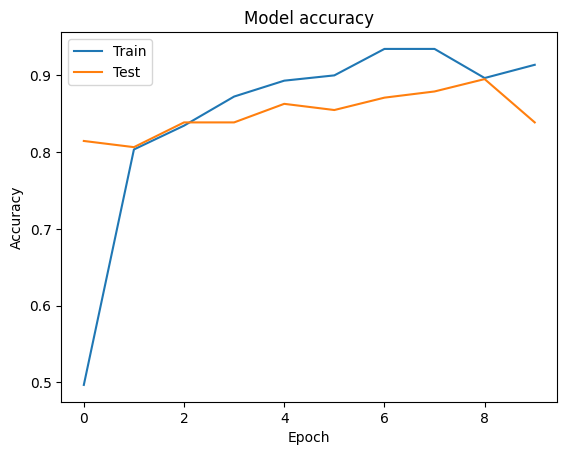

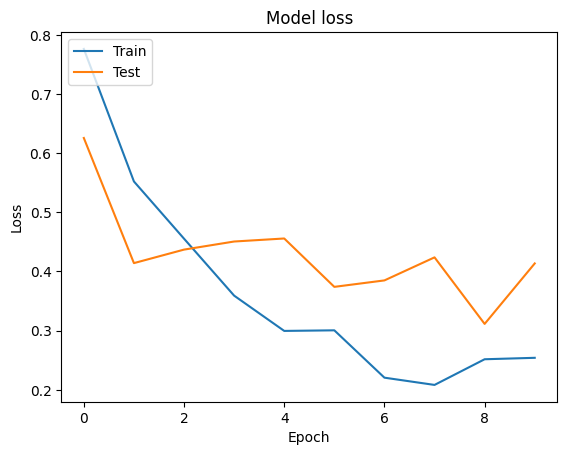

In [152]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
This is Nicolas Cage:


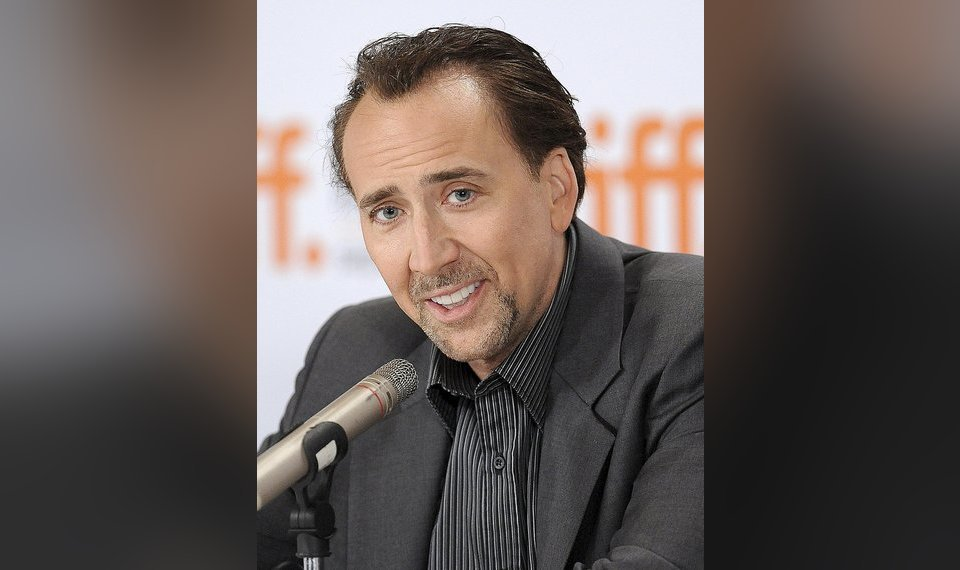

In [153]:
# MAKING PREDICTIONS:
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import Image
import os
import cv2 

file = r"test\class1\Nic_Cage_182.jpg"
test_image = image.load_img(file, target_size = (200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict(test_image)

training_set.class_indices
if result[0][0] == 1:
    prediction = 'This is Nicolas Cage:'
else:
    prediction = 'This is not Nicolas Cage:'


print(prediction)
img = Image(file, width = "400", height = "400")
display(img)
print("\n")
print("\n")

-------------------------------------------------------------------------------------------------------------

In [154]:
# Attribute: https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd
# author: nybles

# building our model
classifier1 = Sequential()
classifier1.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), activation = 'relu'))

classifier1.add(MaxPooling2D(pool_size=(2, 2)))

classifier1.add(Flatten())

classifier1.add(Dense(128, activation = 'relu'))
classifier1.add(Dense(1, activation='sigmoid'))

classifier1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [155]:
# training our network
history1 = classifier1.fit(training_set,
                         steps_per_epoch = 8000,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 800)

Epoch 1/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 7s 555us/step - accuracy: 0.6000 - loss: 13.8617 - val_accuracy: 0.6290 - val_loss: 13.8752
Epoch 2/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 503us/step - accuracy: 0.7034 - loss: 6.8121 - val_accuracy: 0.6935 - val_loss: 3.3149
Epoch 3/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 542us/step - accuracy: 0.7965 - loss: 1.5854 - val_accuracy: 0.7097 - val_loss: 1.5413
Epoch 4/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 509us/step - accuracy: 0.8724 - loss: 0.6921 - val_accuracy: 0.8226 - val_loss: 0.8961
Epoch 5/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 7s 551us/step - accuracy: 0.9207 - loss: 0.3155 - val_accuracy: 0.8710 - val_loss: 0.6824
Epoch 6/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 7s 555us/step - accuracy: 0.9414 - loss: 0.2978 - val_accuracy: 0.8306 - val_loss: 0.8021
Epoch 7/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 552us/step - accuracy: 0.9276 - loss: 0.2470 - val_accuracy: 0.8387 - val_loss: 0.7211
Epoch 8/10
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 6s 539us/step - accuracy: 0.9310

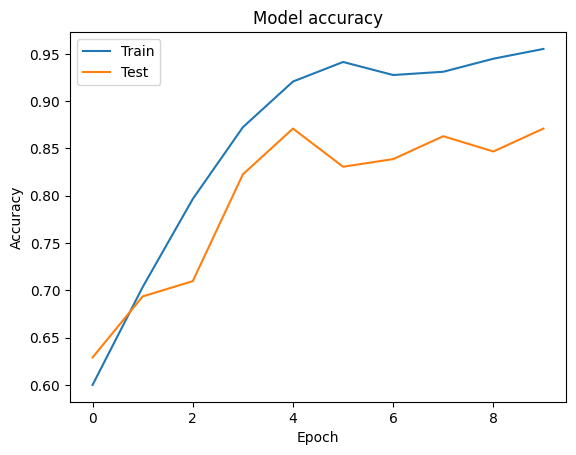

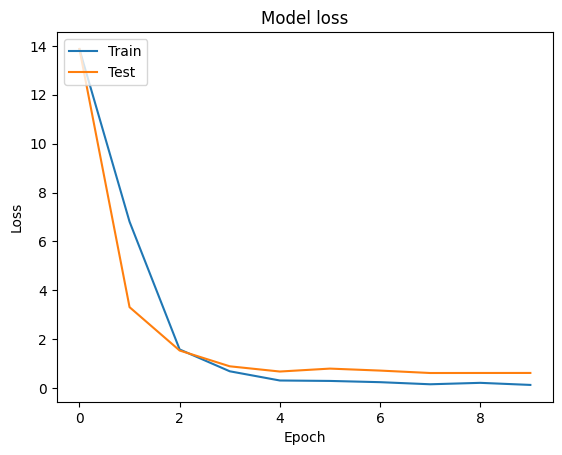

In [156]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
This is Nicolas Cage:


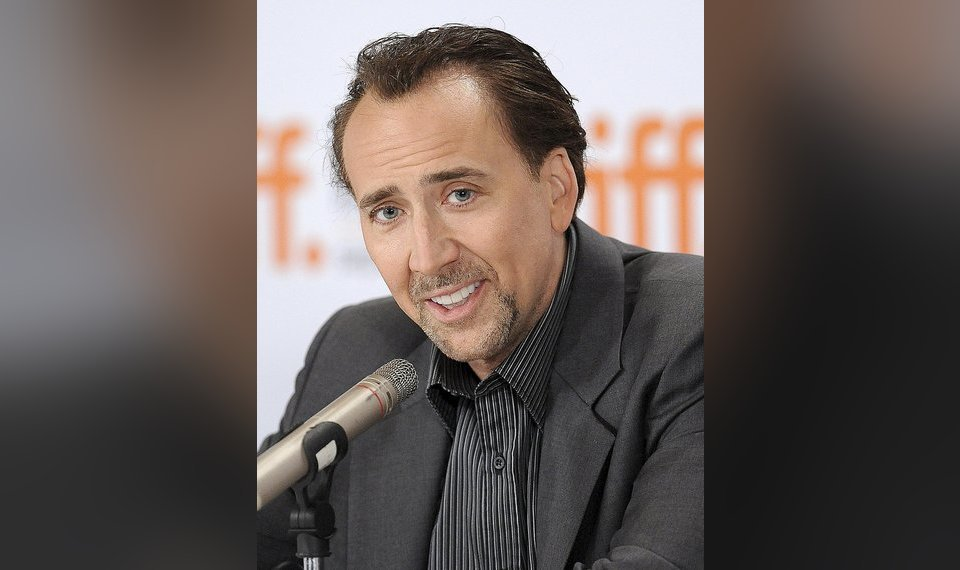

In [157]:
# MAKING PREDICTIONS:
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import Image
import os
import cv2 

file = r"test\class1\Nic_Cage_182.jpg"
test_image = image.load_img(file, target_size = (200, 200))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

result = classifier1.predict(test_image)

training_set.class_indices
if result[0][0] == 1:
    prediction = 'This is Nicolas Cage:'
else:
    prediction = 'This is not Nicolas Cage:'


print(prediction)
img = Image(file, width = "400", height = "400")
display(img)
print("\n")
print("\n")

--------------------------------------------------------------------------------------------------------

### Predict Test images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
This is not Nicolas Cage:


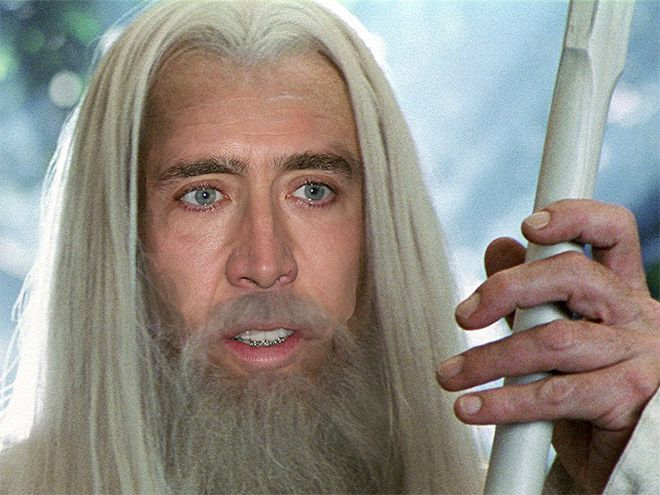





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
This is Nicolas Cage:


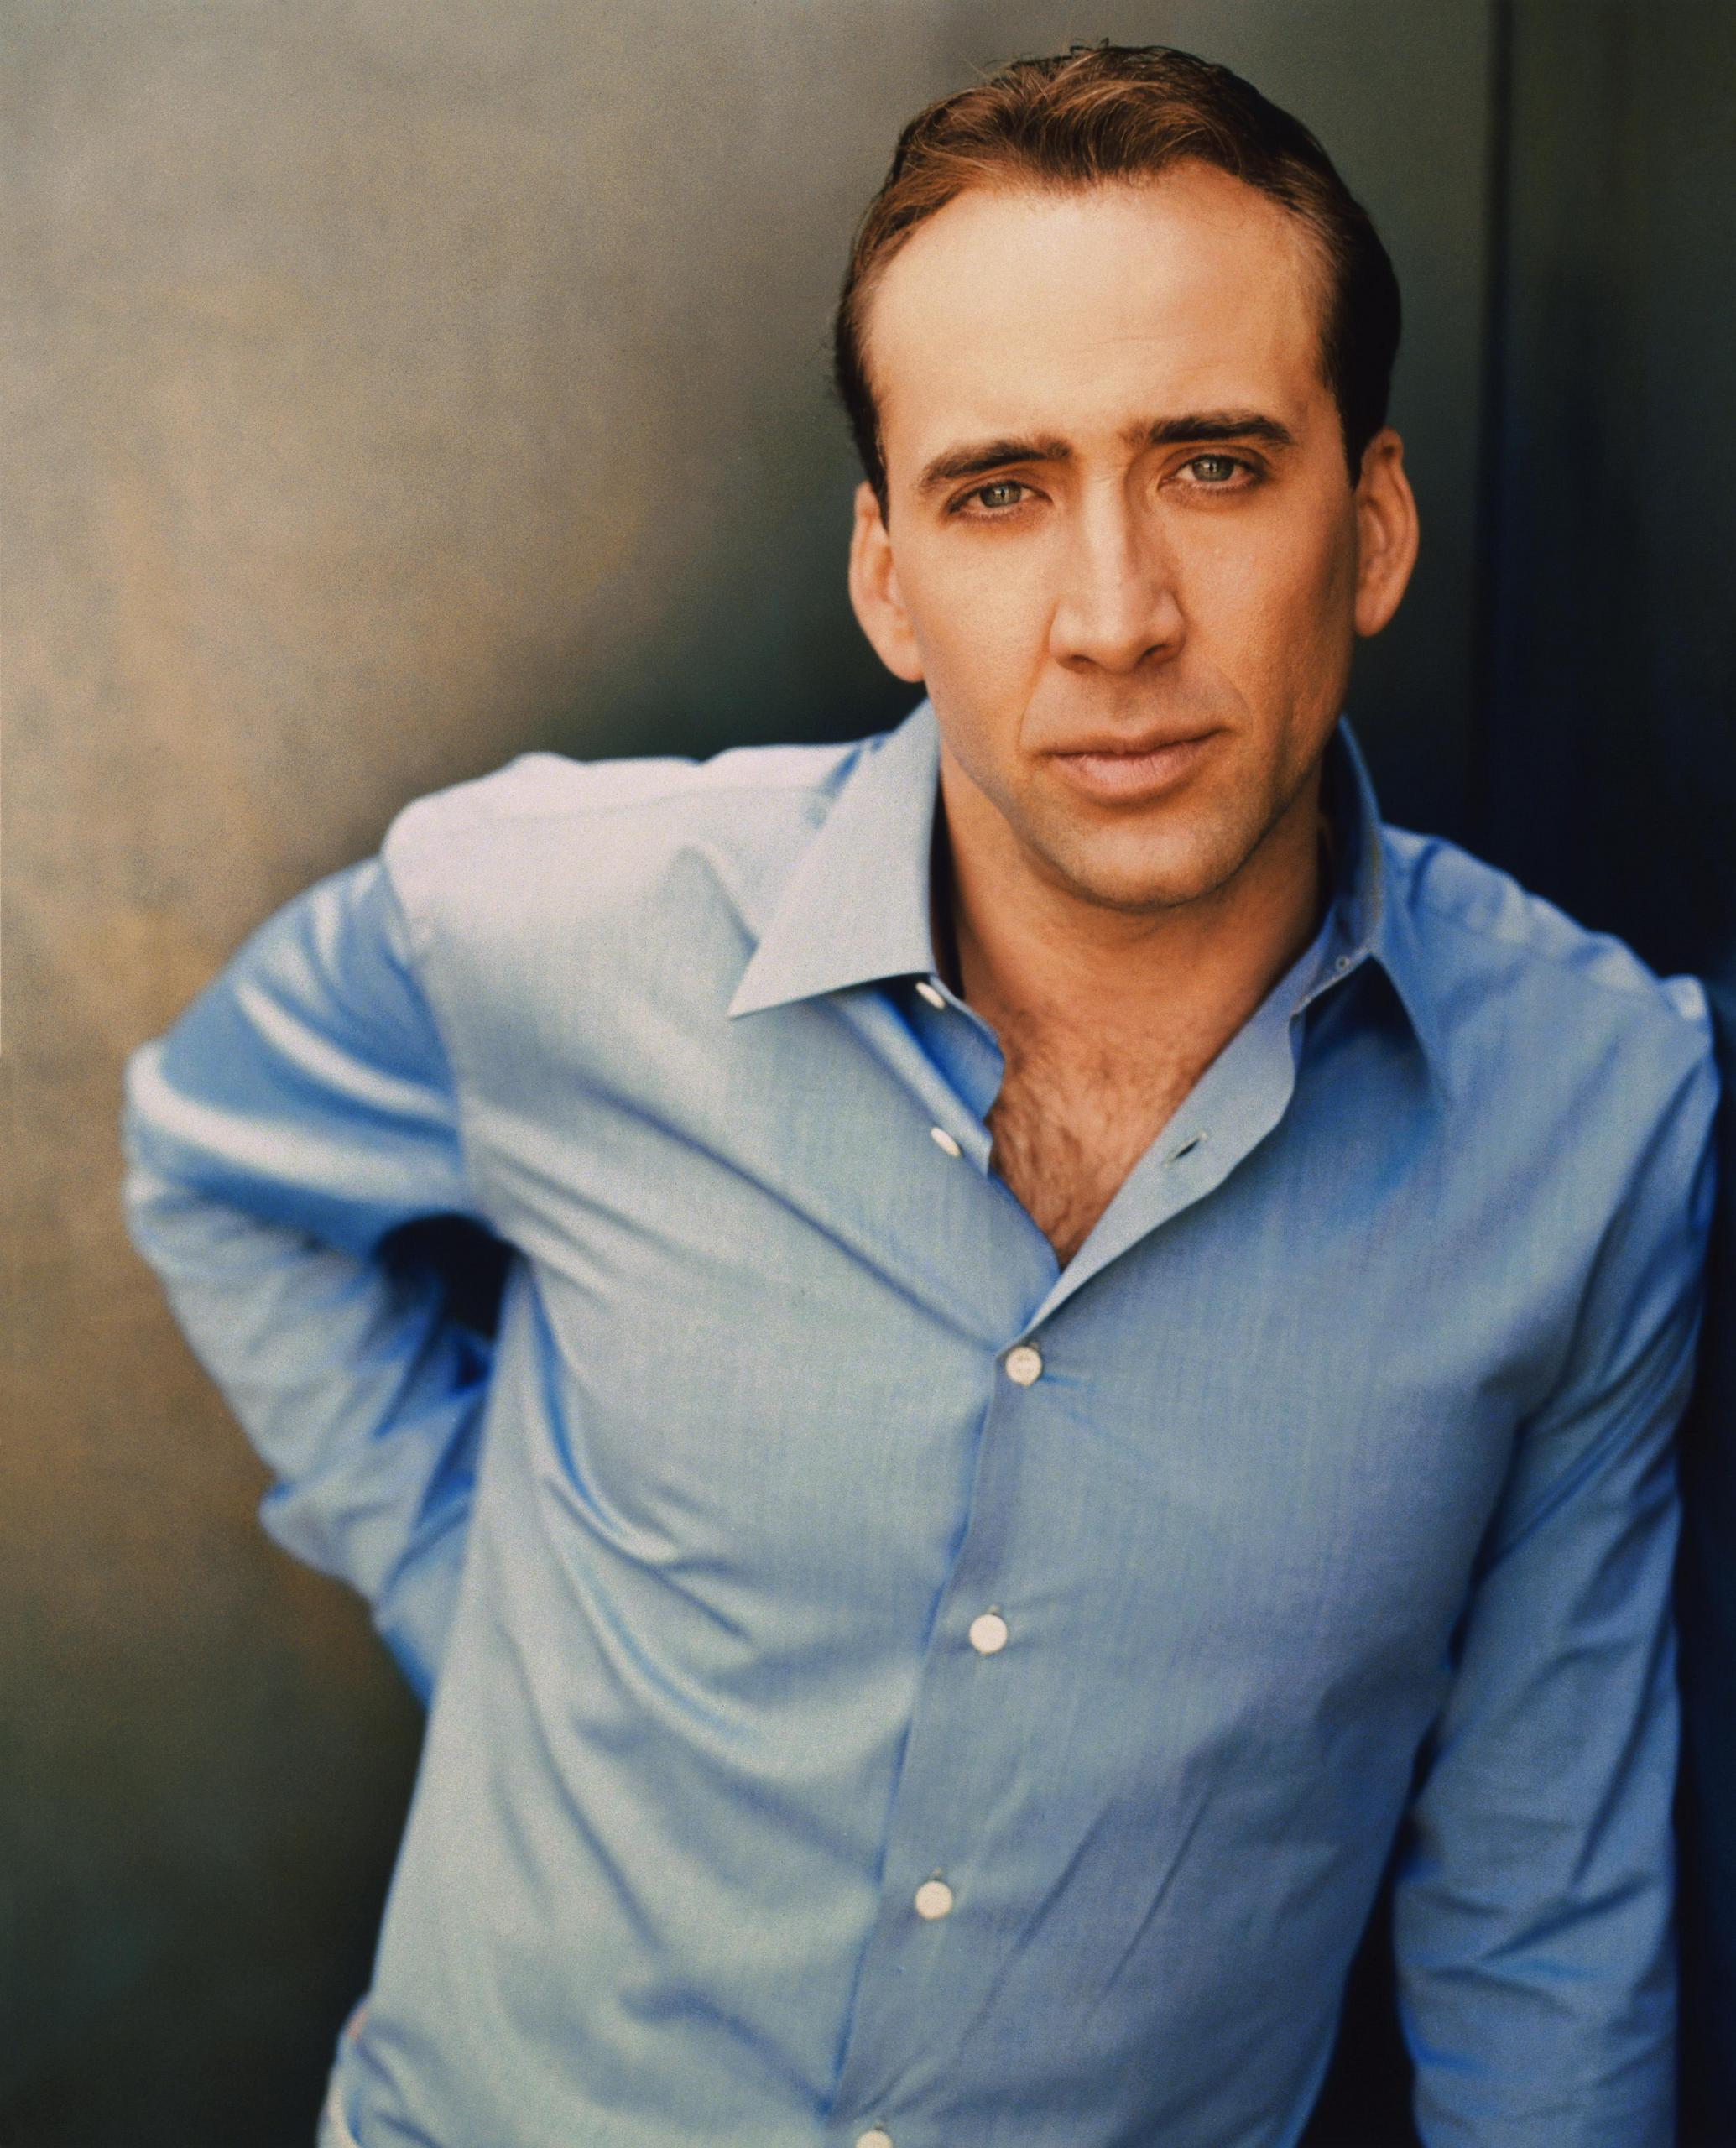





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This is Nicolas Cage:


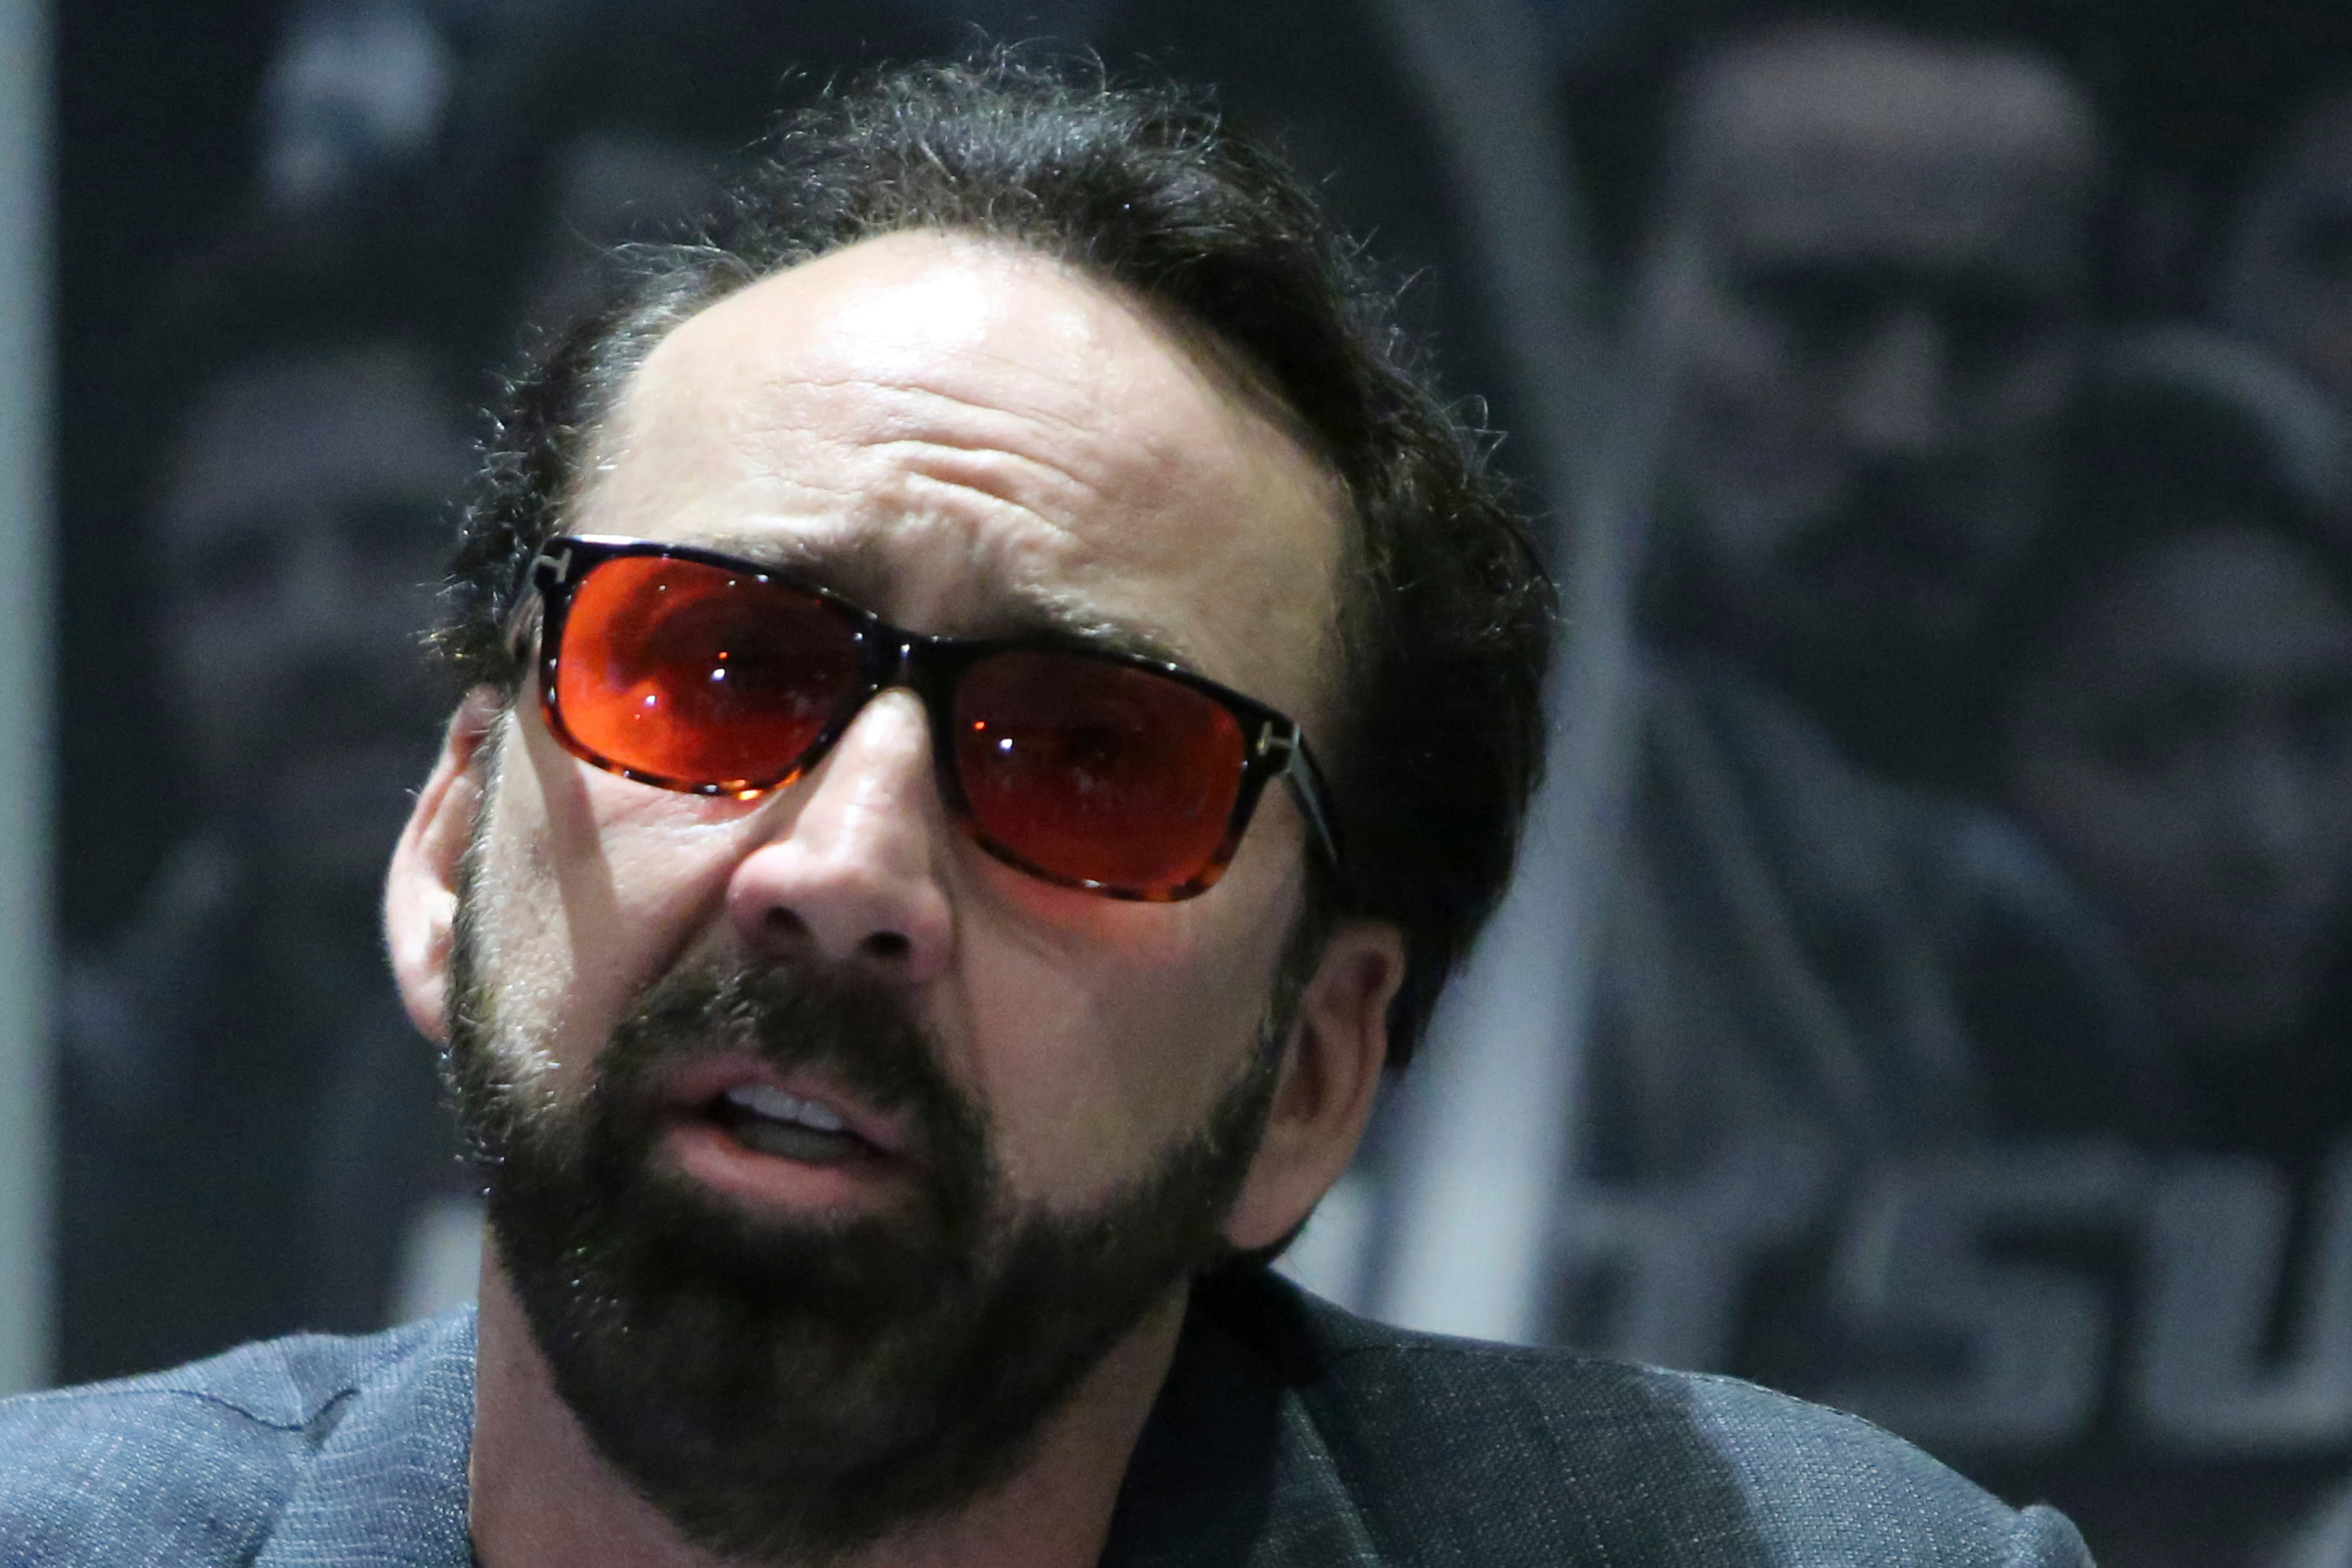





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This is Nicolas Cage:


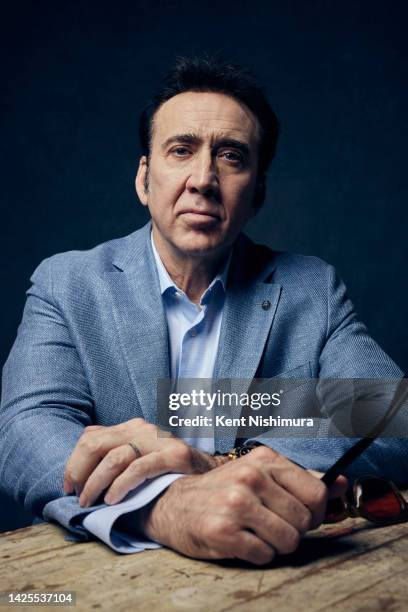





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
This is Nicolas Cage:


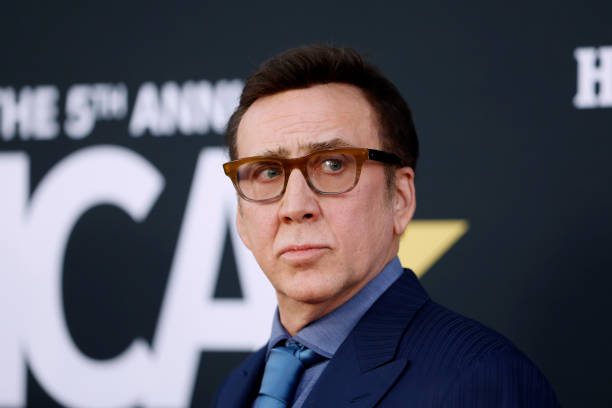





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
This is Nicolas Cage:


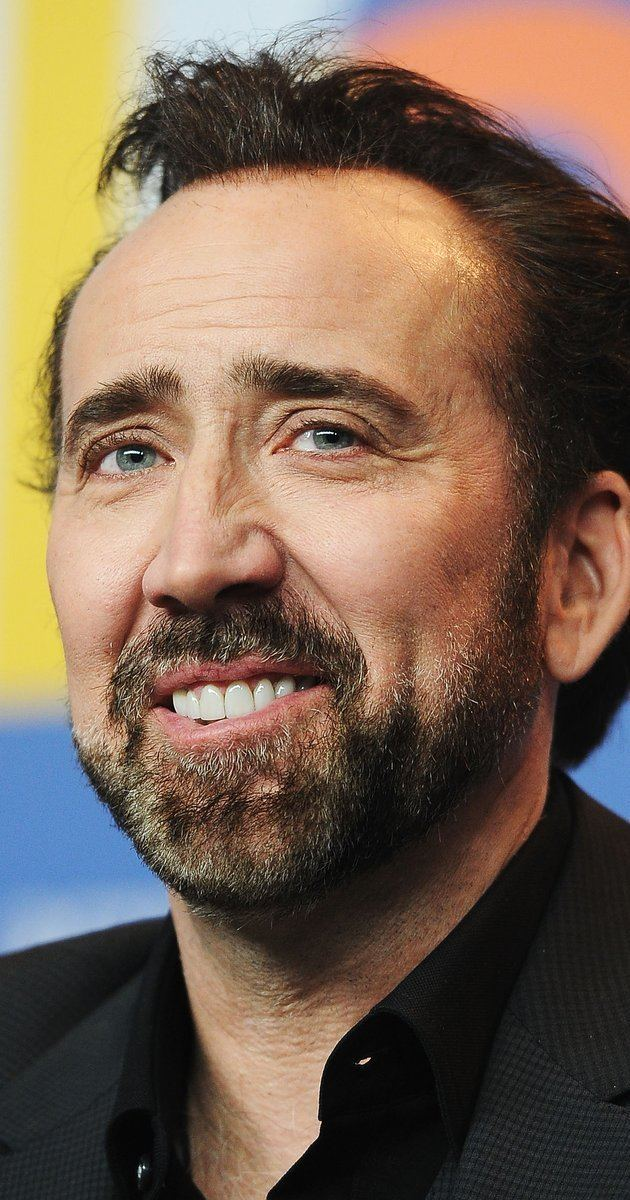





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This is Nicolas Cage:


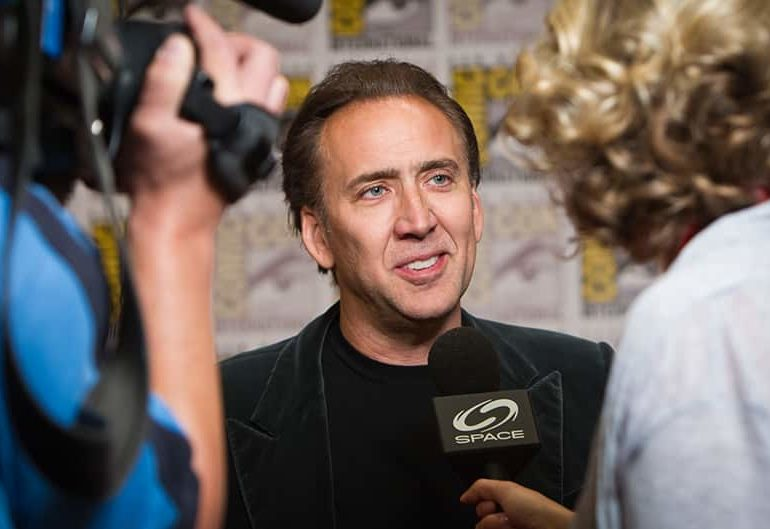





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
This is not Nicolas Cage:


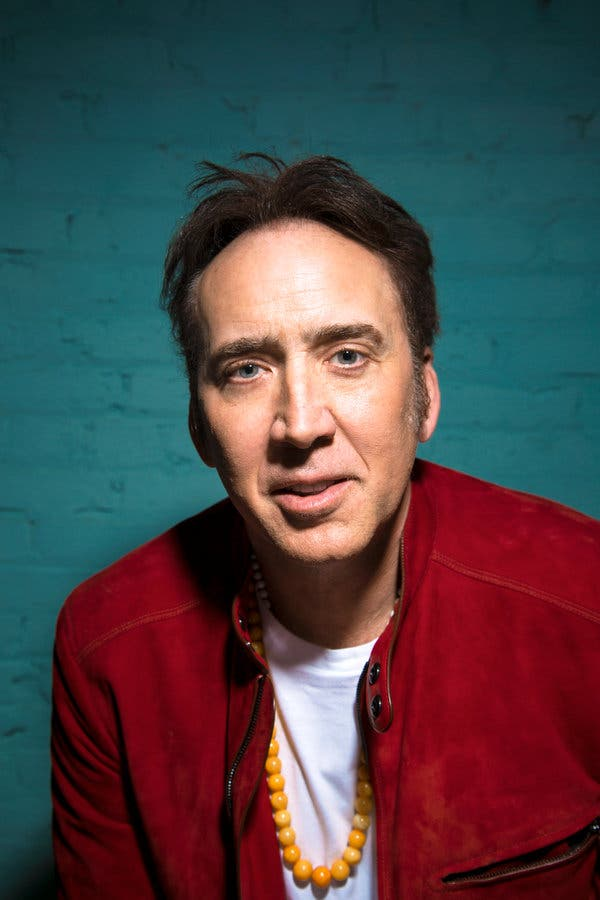





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
This is Nicolas Cage:


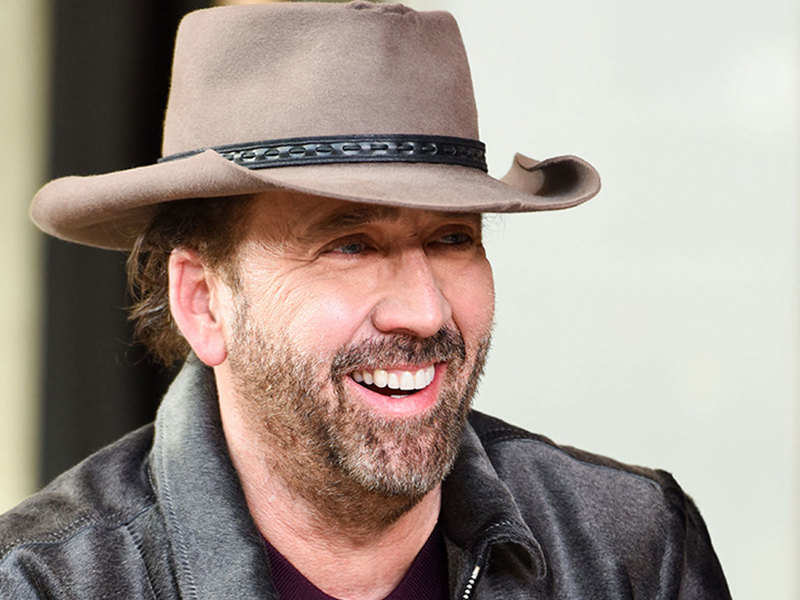





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This is Nicolas Cage:


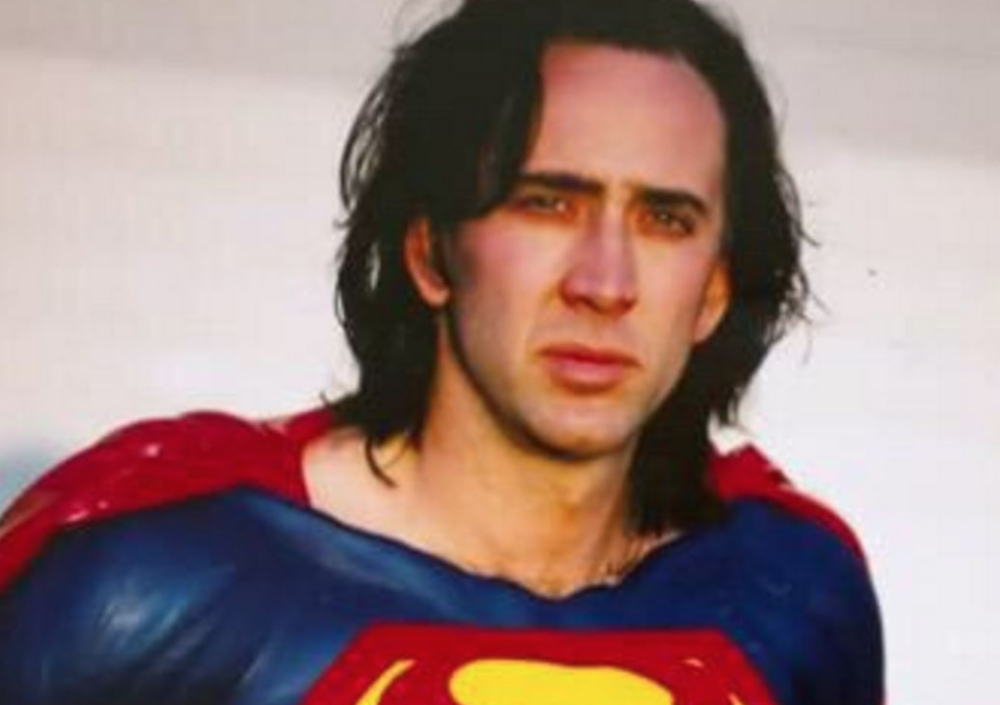





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
This is Nicolas Cage:


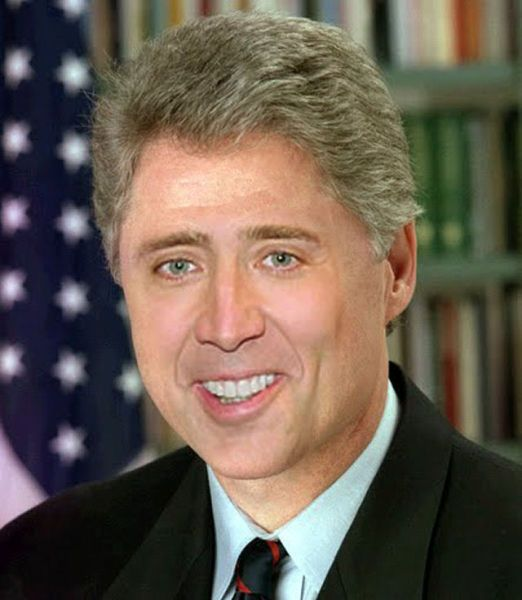





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This is not Nicolas Cage:


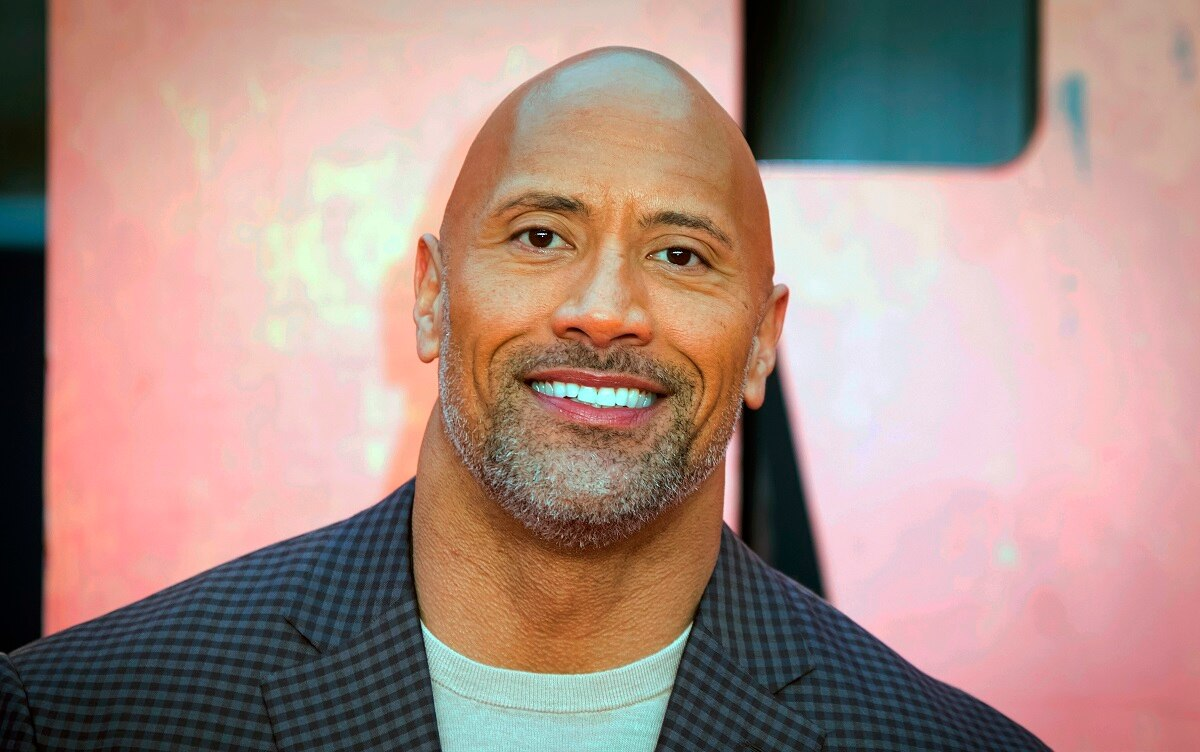

In [158]:
predict_path = 'predict'

for file in os.listdir(predict_path):
    if not file.startswith('.'): # to avoid .ds_store files on my mac
        file = predict_path + "/" + file

        test_image = image.load_img(file, target_size = (200, 200))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        
        result = classifier1.predict(test_image)

        training_set.class_indices
        if result[0][0] == 1:
            prediction = 'This is Nicolas Cage:'
        else:
            prediction = 'This is not Nicolas Cage:'

        
        print(prediction)
        img = Image(file, width = "400", height = "400")
        display(img)
        print("\n")
        print("\n")

-----------------------------------------------------------------------------------------------------